          ds         y
0 2023-01-01  0.882026
1 2023-01-02  0.254996
2 2023-01-03  0.599038
3 2023-01-04  1.284536
4 2023-01-05  1.151794


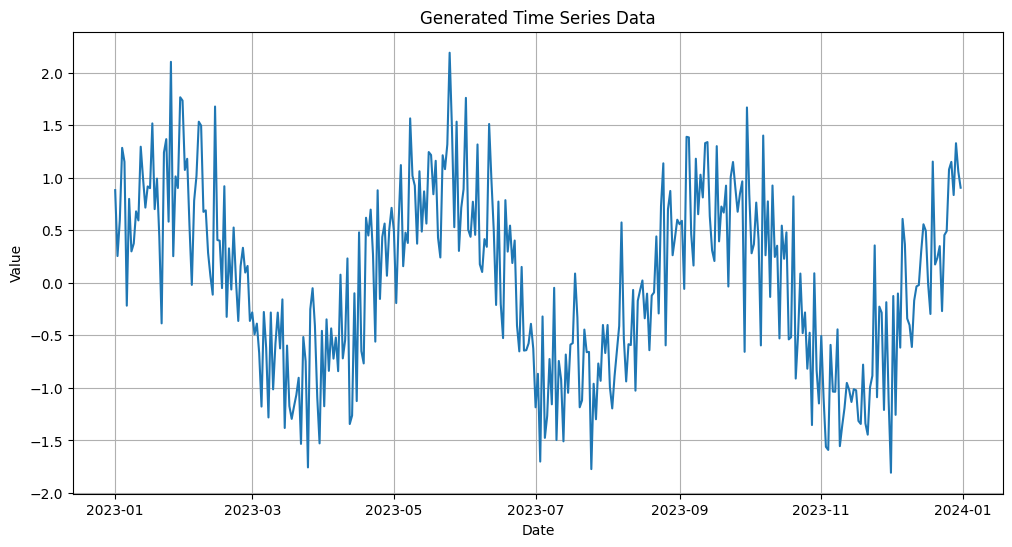

09:27:05 - cmdstanpy - INFO - Chain [1] start processing
09:27:05 - cmdstanpy - INFO - Chain [1] done processing


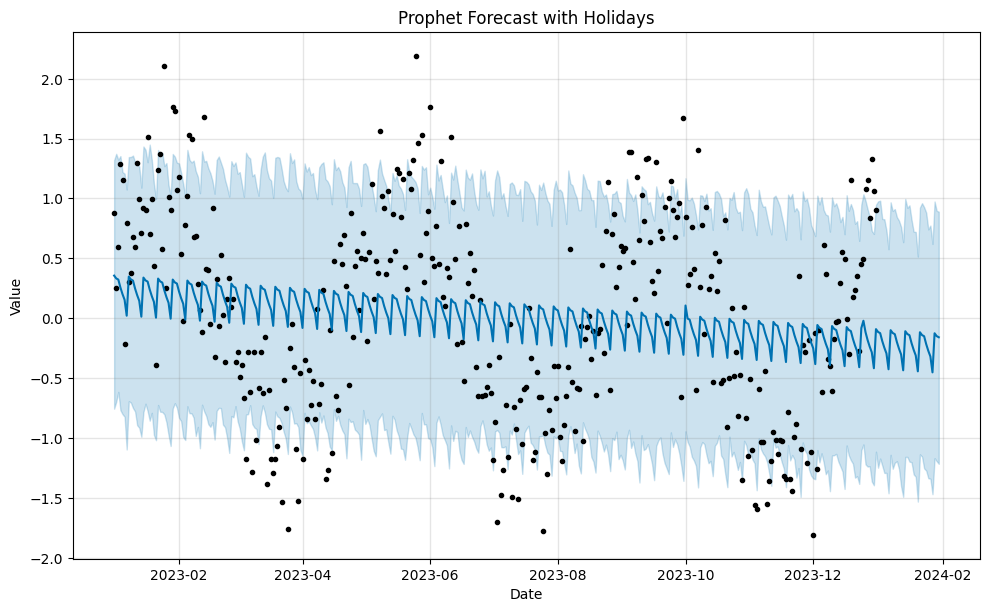

In [ ]:
import pandas as pd
import numpy as np

# 生成一个日期范围
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')

# 创建一个带有趋势和季节性的模拟时间序列数据
np.random.seed(0)
data = pd.DataFrame({
    'ds': dates,
    'y': np.sin(np.linspace(0, 20, num=365)) + np.random.normal(0, 0.5, 365)
})

data['y'] = (data['y'] - data['y'].mean()) / (data['y'].std())

# 展示生成的数据
print(data.head())

# 可视化生成的数据
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'])
plt.title('Generated Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

from prophet import Prophet

# 假设的节假日日期
holidays = pd.DataFrame({
    'holiday': 'holiday_name',
    'ds': pd.to_datetime(['2023-10-01', '2023-12-25'])  # 假设国庆节和圣诞节
})

# 初始化Prophet模型并添加假日效应
model = Prophet(holidays=holidays)

# 拟合模型
model.fit(data)

# 创建一个用于预测未来数据的数据框
future = model.make_future_dataframe(periods=180, freq='min')  # 预测未来30天
future.tail()
# 进行预测
forecast = model.predict(future)

# 展示预测结果
model.plot(forecast)
plt.title('Prophet Forecast with Holidays')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()



In [5]:
data

,ds,y
0,2023-01-01,0.882026
1,2023-01-02,0.254996
2,2023-01-03,0.599038
3,2023-01-04,1.284536
4,2023-01-05,1.151794
...,...,...
360,2023-12-27,1.151245
361,2023-12-28,0.835494
362,2023-12-29,1.328609
363,2023-12-30,1.059139
